### Función sigmoide 

Función comunmente usada para transformar un numero (el que sea) a algo entre 0 y 1

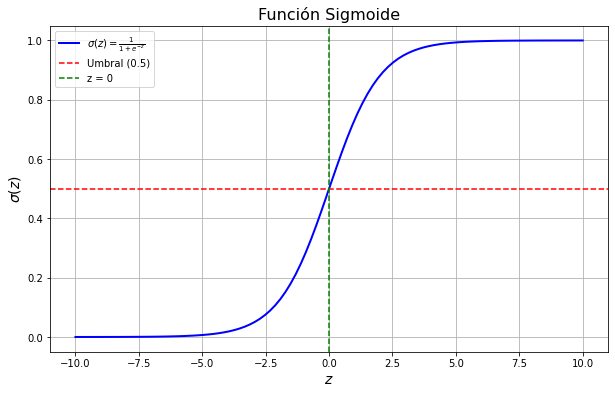

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Crear un rango de valores para z
z_values = np.linspace(-10, 10, 100)  # Valores de z desde -10 hasta 10

# Calcular los valores de la función sigmoide para cada z
sigmoid_values = sigmoid(z_values)

# Graficar la función sigmoide
plt.figure(figsize=(10, 6))
plt.plot(z_values, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue', linewidth=2)
plt.xlabel(r'$z$', fontsize=14)
plt.ylabel(r'$\sigma(z)$', fontsize=14)
plt.title('Función Sigmoide', fontsize=16)
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label='Umbral (0.5)')  # Línea horizontal en y = 0.5
plt.axvline(0, color='green', linestyle='--', label='z = 0')  # Línea vertical en z = 0
plt.legend()
plt.show()

# **Regresión Logística y Máxima Verosimilitud**

En **regresión logística**, modelamos la **probabilidad de éxito** como:

$$
p(y = 1 | X) = \sigma(\theta^T X) = \frac{1}{1 + e^{-\theta^T X}}
$$

Donde $\sigma(z)$ es la función sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### **Función de Verosimilitud**
Como \( y \) sigue una **distribución de Bernoulli**, la función de verosimilitud es:

$$
L(\theta) = \prod_{i=1}^{m} p(y_i | X_i; \theta) = \prod_{i=1}^{m} \left[ \sigma(\theta^T X_i) \right]^{y_i} \cdot \left[ 1 - \sigma(\theta^T X_i) \right]^{(1 - y_i)}
$$

Tomamos el **logaritmo de la verosimilitud**:

$$
\log L(\theta) = \sum_{i=1}^{m} \left[ y_i \log \sigma(\theta^T X_i) + (1 - y_i) \log (1 - \sigma(\theta^T X_i)) \right]
$$

### Función de Pérdida
Para estimar $\theta$, **maximizamos la log-verosimilitud**. 

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log \sigma(\theta^T X_i) + (1 - y_i) \log (1 - \sigma(\theta^T X_i)) \right]
$$



# **Regresión Logística con ascenso en Gradiente**

Queremos minimizar la función de pérdida:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log \sigma(\theta^T X_i) + (1 - y_i) \log (1 - \sigma(\theta^T X_i)) \right]
$$

### **Algoritmo ascenso en Gradiente**

$$
\theta_j := \theta_j + \alpha \frac{\partial J}{\partial \theta_j}
$$



### **Gradiente**
El gradiente con respecto a $\theta_j$ es:

$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^T X_i) - y_i \right) X_{ij}
$$

### **Algoritmo del Descenso en Gradiente**
1. **Inicializar** $\theta$.
2. **Repetir** hasta convergencia:

$$
\theta_j := \theta_j + \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\theta^T X_i) - y_i \right) X_{ij}
$$

Donde $\alpha$ es la **tasa de aprendizaje**.

**Conclusión:**  
El descenso en gradiente encuentra los valores óptimos de $\theta$ iterativamente, ajustándolos en la dirección del gradiente para minimizar la función de pérdida.


### **Derivada de la Función de Pérdida en Regresión Logística**

La función de pérdida (log-verosimilitud negativa) para la regresión logística es:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log \sigma(\theta^T X_i) + (1 - y_i) \log (1 - \sigma(\theta^T X_i)) \right]
$$

donde $\sigma(z)$ es la función sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### **Paso 1: Aplicamos la Regla de la Cadena**
Queremos derivar $J(\theta)$ con respecto a $\theta_j$:

$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \frac{\partial}{\partial \theta_j} \log \sigma(\theta^T X_i) + (1 - y_i) \frac{\partial}{\partial \theta_j} \log (1 - \sigma(\theta^T X_i)) \right]
$$

### **Paso 2: Derivadas de los términos logarítmicos**
Sabemos que la derivada de la sigmoide es:

$$
\frac{d}{dz} \sigma(z) = \sigma(z) (1 - \sigma(z))
$$

1. Para el primer término:

$$
\frac{\partial}{\partial \theta_j} \log \sigma(\theta^T X_i) = \frac{1}{\sigma(\theta^T X_i)} \cdot \sigma(\theta^T X_i) (1 - \sigma(\theta^T X_i)) \cdot X_{ij}
$$

$$
= (1 - \sigma(\theta^T X_i)) X_{ij}
$$

2. Para el segundo término:

$$
\frac{\partial}{\partial \theta_j} \log (1 - \sigma(\theta^T X_i)) = -\frac{1}{1 - \sigma(\theta^T X_i)} \cdot \sigma(\theta^T X_i) (1 - \sigma(\theta^T X_i)) \cdot X_{ij}
$$

$$
= -\sigma(\theta^T X_i) X_{ij}
$$

### **Paso 3: Factorizamos**
Sustituyendo estas derivadas en la ecuación original:

$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ y_i (1 - \sigma(\theta^T X_i)) X_{ij} - (1 - y_i) \sigma(\theta^T X_i) X_{ij} \right]
$$

Factorizando $X_{ij}$, tenemos el **resultado final**:

$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} X_{ij} \left[ y_i - \sigma(\theta^T X_i) \right]
$$

Este es el **gradiente** que usamos en descenso de gradiente para actualizar \( \theta \):

$$
\theta_j \leftarrow \theta_j + \alpha \frac{\partial J}{\partial \theta_j}
$$


### ¿Por qué no es descenso en gradiente sino asccenso? 

La función de perdida de la regresión logistica, a diferencia de la regresión lineal es creciente ... por lo tanto necesitamos *maximizar* y no minimizar

<ipython-input-1-773b0d732471>:13: RuntimeWarning: divide by zero encountered in log
  loss = (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
<ipython-input-1-773b0d732471>:13: RuntimeWarning: invalid value encountered in multiply
  loss = (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


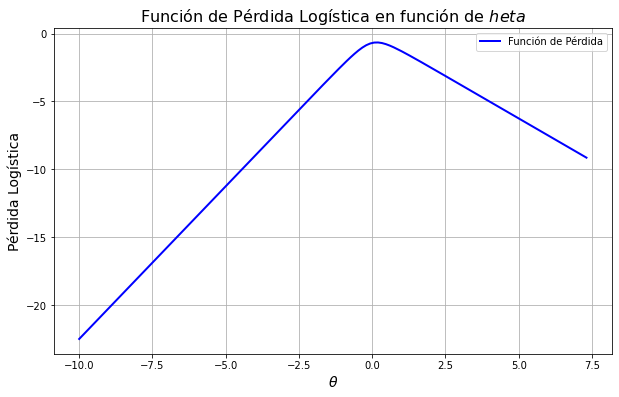

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de pérdida logística para un solo theta
def logistic_loss(theta, X, y):
    m = len(y)
    z = X * theta  # X es un vector en este caso
    h = sigmoid(z)
    loss = (1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Datos de ejemplo (en una dimensión)
X = np.array([2, 3, 4, 5])  # Características (una sola característica)
y = np.array([0, 0, 1, 1])  # Etiquetas (0 o 1)

# Rango de valores para theta
theta_values = np.linspace(-10, 10, 150)  # Valores de theta desde -10 hasta 10

# Calcular la pérdida para cada valor de theta
loss_values = [logistic_loss(theta, X, y) for theta in theta_values]

# Graficar la función de pérdida
plt.figure(figsize=(10, 6))
plt.plot(theta_values, loss_values, label='Función de Pérdida', color='blue', linewidth=2)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Pérdida Logística', fontsize=14)
plt.title('Función de Pérdida Logística en función de $\theta$', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

### Ejemplo, codigo para obtener una regresión lógistica

Theta óptimo: [-3.37307951  1.05486382]


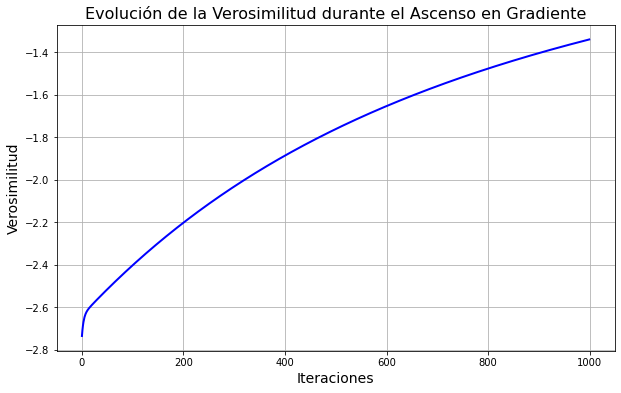

In [22]:

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de verosimilitud (log-likelihood)
def log_likelihood(X, y, theta):
    z = X.dot(theta)
    h = sigmoid(z)
    likelihood = np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return likelihood

# Ascenso en gradiente
def gradient_ascent(X, y, theta, alpha, num_iterations):
    m = len(y)
    likelihood_history = []

    for i in range(num_iterations):
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = X.T.dot(y - h)  # Gradiente de la verosimilitud
        theta += alpha * gradient  # Actualización de theta (ascenso en gradiente)
        
        # Guardar el valor de la verosimilitud en cada iteración
        likelihood_history.append(log_likelihood(X, y, theta))
    
    return theta, likelihood_history

# Datos de ejemplo
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])  # Matriz de características (con columna de unos para el término de sesgo)
y = np.array([0, 0, 1, 1])  # Etiquetas (0 o 1)

# Parámetros iniciales
theta = np.zeros(X.shape[1])  # Inicializamos theta con ceros
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 1000  # Número de iteraciones

# Ejecutar el ascenso en gradiente
theta_optimal, likelihood_history = gradient_ascent(X, y, theta, alpha, num_iterations)

# Resultados
print("Theta óptimo:", theta_optimal)

# Graficar la evolución de la verosimilitud
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), likelihood_history, color='blue', linewidth=2)
plt.xlabel('Iteraciones', fontsize=14)
plt.ylabel('Verosimilitud', fontsize=14)
plt.title('Evolución de la Verosimilitud durante el Ascenso en Gradiente', fontsize=16)
plt.grid(True)
plt.show()


Quiere decir que la ecuación estimada es: 

$$
\hat{y} = \sigma(\theta^T X) = \frac{1}{1 + e^{-3.47 + 1.05 x_1}}
$$


## Anexo derivada de la función sigmoide

La función **sigmoide** se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

### **Paso 1: Aplicamos la Regla de la Cadena**  
Derivamos \( \sigma(z) \) con respecto a \( z \):

$$
\frac{d}{dz} \sigma(z) = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right)
$$

Usamos la regla del cociente:

$$
\frac{d}{dz} \left( \frac{1}{f(z)} \right) = -\frac{f'(z)}{f(z)^2}
$$

donde \( f(z) = 1 + e^{-z} \), así que:

$$
f'(z) = -e^{-z}
$$

Aplicamos la regla:

$$
\frac{d}{dz} \sigma(z) = -\frac{-e^{-z}}{(1 + e^{-z})^2} = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

---

### **Paso 2: Factorizamos en términos de \( \sigma(z) \)**  
Sabemos que:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

y también que:

$$
1 - \sigma(z) = \frac{e^{-z}}{1 + e^{-z}}
$$

Multiplicamos ambas expresiones:

$$
\sigma(z) (1 - \sigma(z)) = \left(\frac{1}{1 + e^{-z}}\right) \left(\frac{e^{-z}}{1 + e^{-z}}\right) = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

---

### **Resultado Final**  
La derivada de la sigmoide es:

$$
\frac{d}{dz} \sigma(z) = \sigma(z) (1 - \sigma(z))
$$
